Dataset Loaded Successfully!


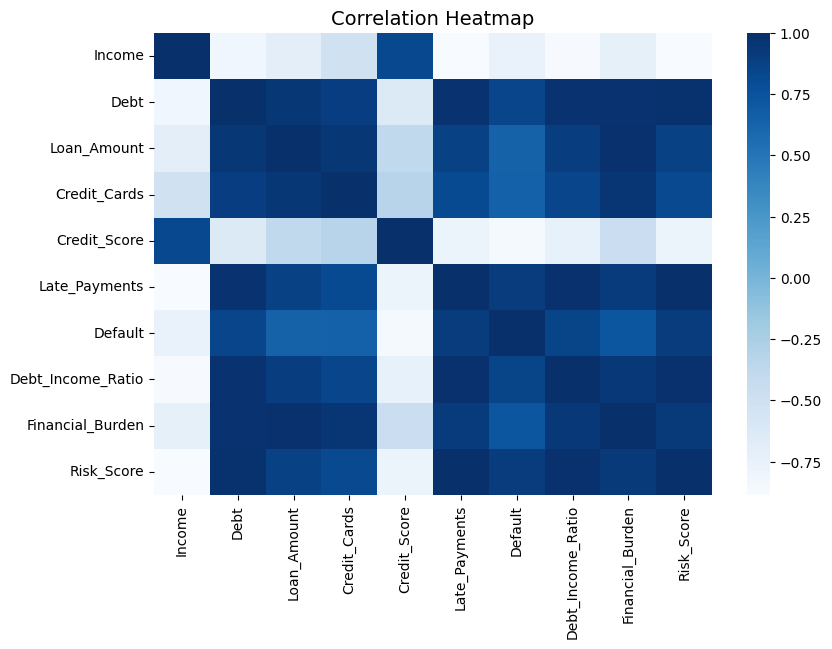

Model Training Completed!

📌 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

ROC-AUC Score: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


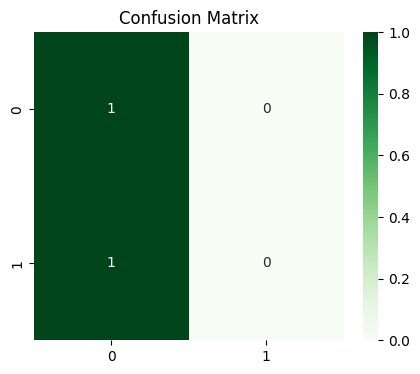

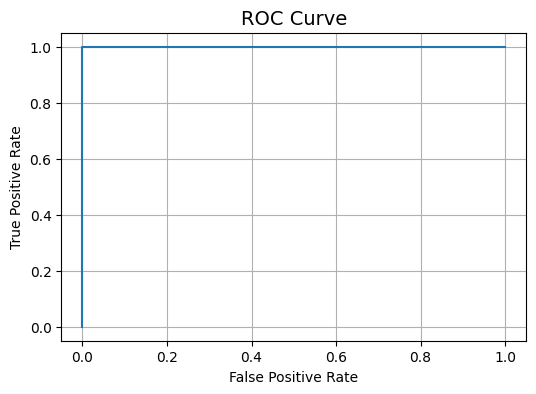

Probability of Default: 0.19333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

# TASK 1 : CREDIT SCORING MODEL


#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# LOAD DATASET
df = pd.read_csv("credit_sample.csv")
print("Dataset Loaded Successfully!")
df.head()

# SIMPLE + SMART FEATURE
df["Debt_Income_Ratio"] = df["Debt"] / (df["Income"] + 1)
df["Financial_Burden"] = df["Debt"] + df["Loan_Amount"] + df["Credit_Cards"] * 3000
df["Risk_Score"] = (
    df["Debt_Income_Ratio"] * 0.4 +
    df["Late_Payments"] * 0.3 +
    (1 / (df["Credit_Score"] + 1)) * 0.3
)

# CORRELATION HEATMAP
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), cmap="Blues", annot=False)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# SPLIT DATA
X = df.drop("Default", axis=1)
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# SCALE FEATURES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#TRAIN MODEL
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)
print("Model Training Completed!")

#  PREDICTION
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#EVALUATION
print("\n📌 CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

#CONFUSION MATRIX
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.show()

#ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

# SAMPLE PREDICTION
sample = np.array([[50000, 10000, 20000, 2, 720, 1, 0.2, 25000, 1.1]])
sample_scaled = scaler.transform(sample)
print("Probability of Default:", model.predict_proba(sample_scaled)[0][1])